In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
%matplotlib inline

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 72E3-1983

 Directory of C:\Users\kulde\ExcelR\Assignment Practice\Multi Linear Regression

18-11-2022  12:37    <DIR>          .
14-11-2022  09:45    <DIR>          ..
07-11-2022  16:13    <DIR>          .ipynb_checkpoints
04-11-2022  18:07             2,436 50_Startups.csv
04-11-2022  18:07               468 proble_statement(50_startups).txt
18-11-2022  12:37           834,201 Startups_50.ipynb
04-11-2022  18:07             1,752 Toyota Corolla.txt
18-11-2022  10:45         1,678,792 Toyota_corolla.ipynb
04-11-2022  18:07           224,041 ToyotaCorolla.csv
               6 File(s)      2,741,690 bytes
               3 Dir(s)  356,240,719,872 bytes free


In [3]:
Toyota_corolla=pd.read_csv("ToyotaCorolla.csv",encoding='ISO-8859–1')
Toyota_corolla.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [4]:
Toyota_corolla=Toyota_corolla[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight","Price"]]
Toyota_corolla

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


In [5]:
Toyota_corolla.describe()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,32500.000000


In [6]:
Toyota_corolla["Price"]

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

# Check if the features are independent of each other using = correlation

<AxesSubplot:>

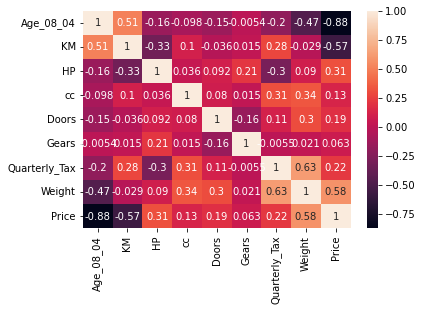

In [7]:
sns.heatmap(Toyota_corolla.corr(), annot=True)

In [8]:
Toyota_corolla.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
Age_08_04,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,-0.876590
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598,-0.569960
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614,0.314990
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637,0.126389
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618,0.185326
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613,0.063104
Quarterly_Tax,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134,0.219197
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000,0.581198
Price,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198,1.000000


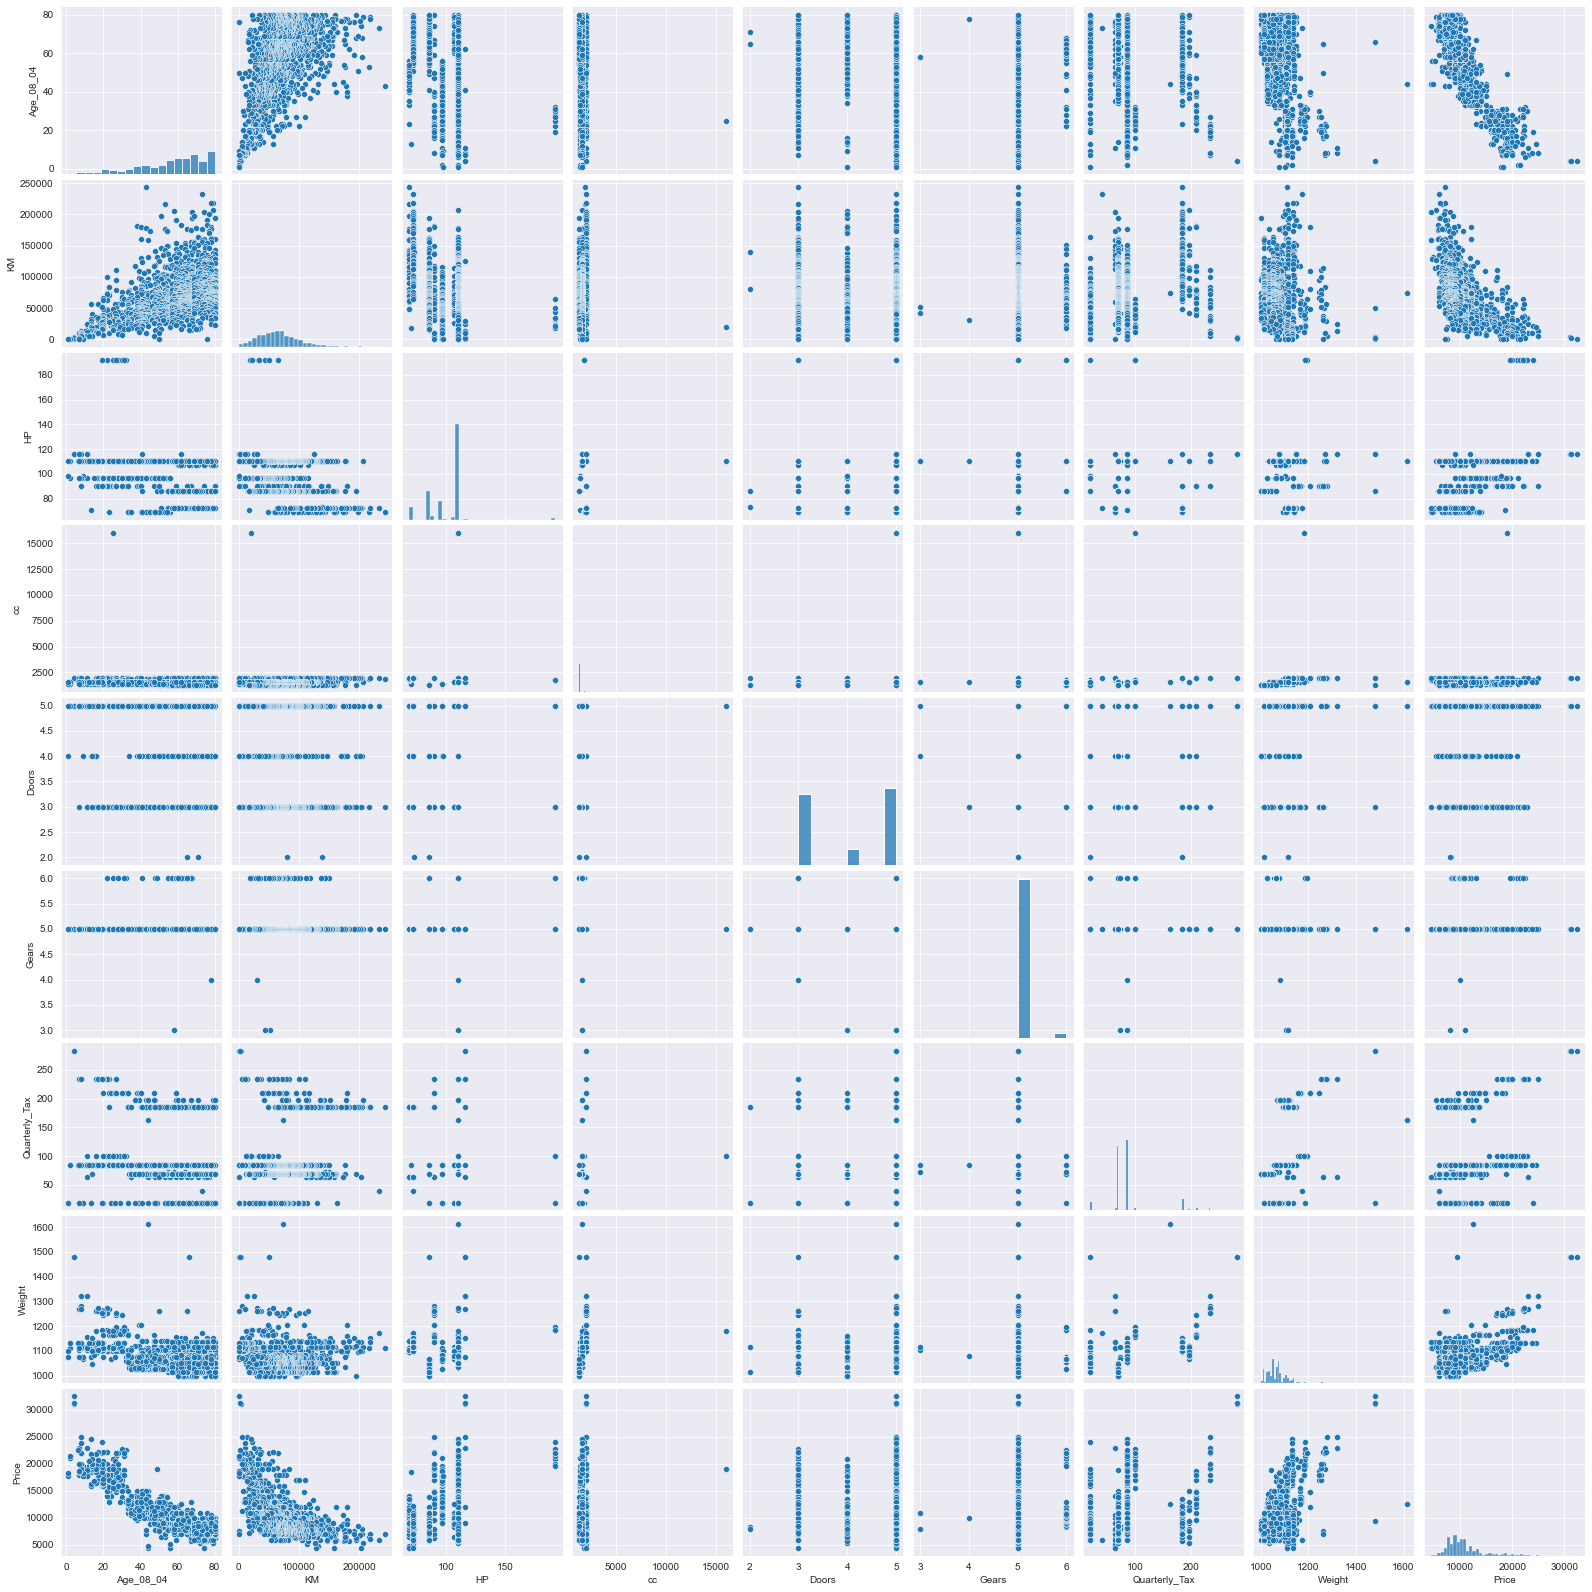

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(Toyota_corolla)

# Check if the features are independent of each other using = VIF(Variance inflation factor) 

In [10]:
rsq_Age_08_04 = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Toyota_corolla).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_Age_08_04) # 19

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Toyota_corolla).fit().rsquared  
vif_KM = 1/(1-rsq_KM) # 625

rsq_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=Toyota_corolla).fit().rsquared  
vif_HP = 1/(1-rsq_HP) #  624

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=Toyota_corolla).fit().rsquared  
vif_cc = 1/(1-rsq_cc) # 19

rsq_Doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=Toyota_corolla).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) # 625

rsq_Gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=Toyota_corolla).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=Toyota_corolla).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax) # 625

rsq_Weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=Toyota_corolla).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight)



d1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[rsq_Age_08_04,rsq_KM,rsq_HP,rsq_cc,rsq_Doors,rsq_Gears,rsq_Quarterly_Tax,rsq_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,0.469389
1,KM,0.430817
2,HP,0.295488
3,cc,0.140815
4,Doors,0.135378
5,Gears,0.089853
6,Quarterly_Tax,0.567368
7,Weight,0.602610


In [11]:
Toyota_corolla.isna().sum()

Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
Price            0
dtype: int64

In [12]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Toyota_corolla).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:38:17   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model.rsquared

0.8637627463428192

In [15]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [16]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

# Check if regressor and residuals(error) are independent of each other

eval_env: 1


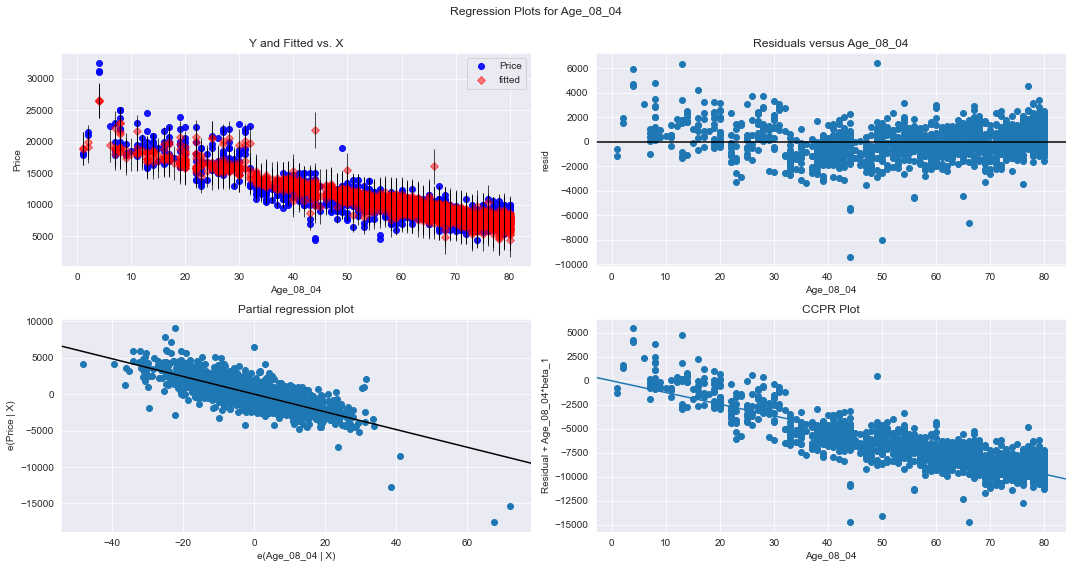

In [17]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()
#model is name of model

eval_env: 1


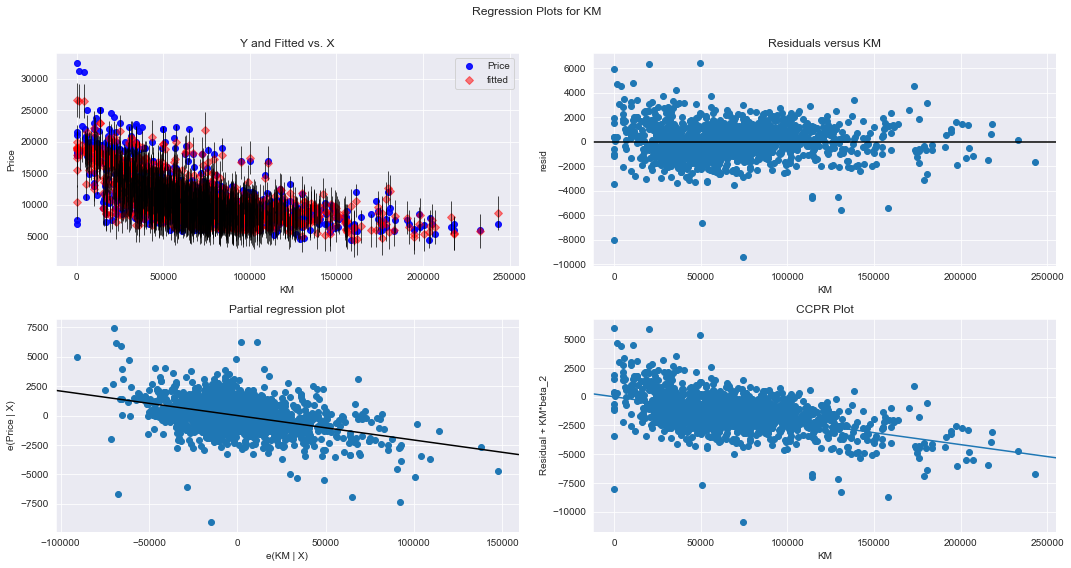

In [18]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


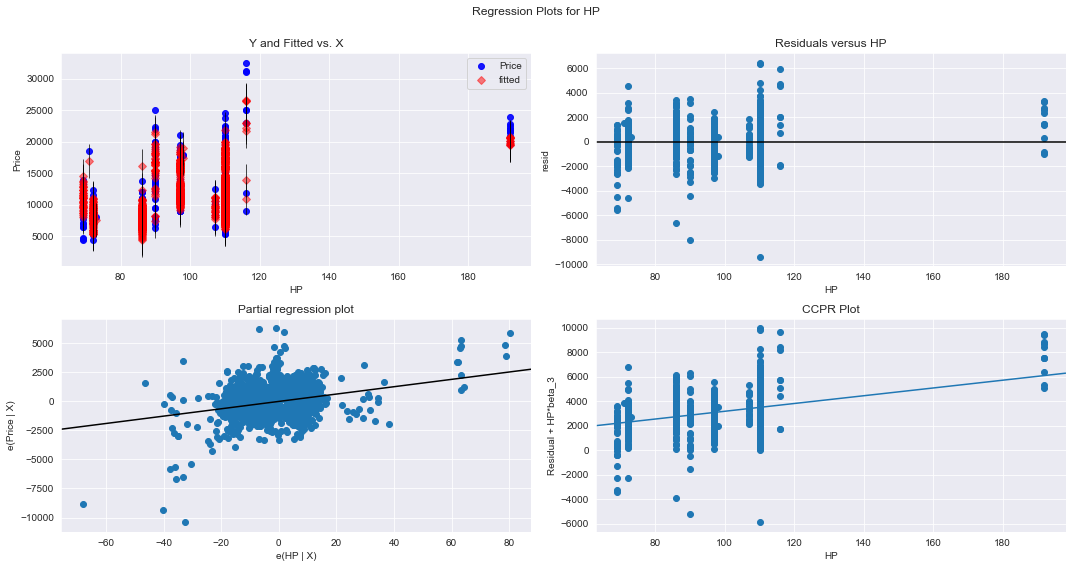

In [19]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


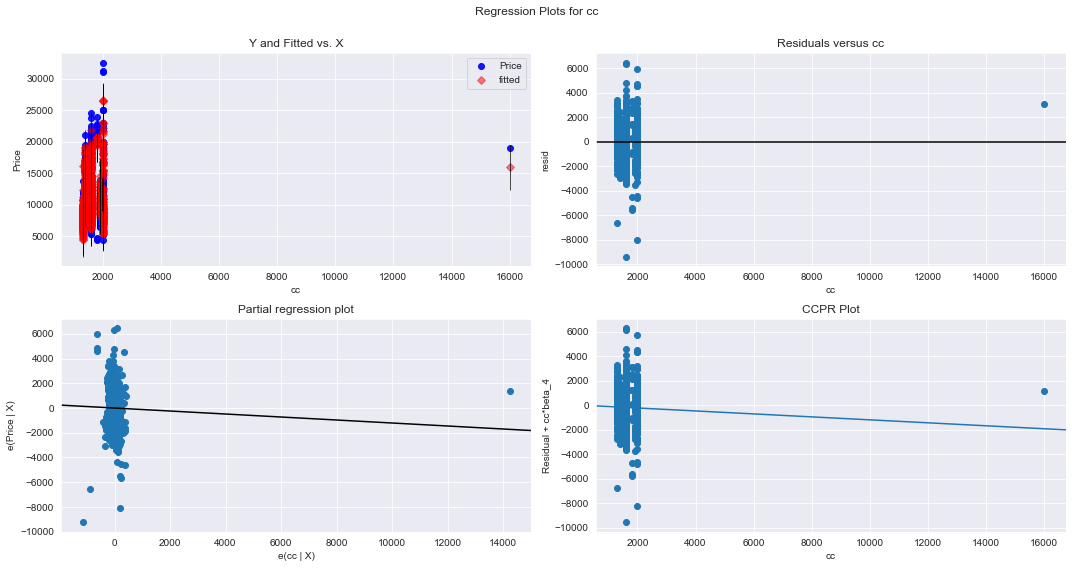

In [20]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


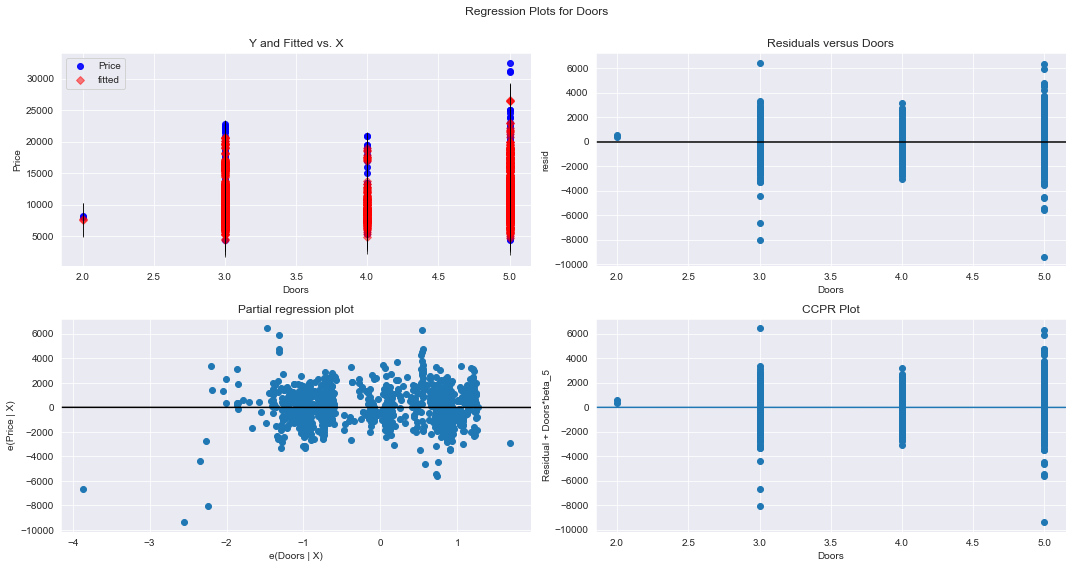

In [21]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


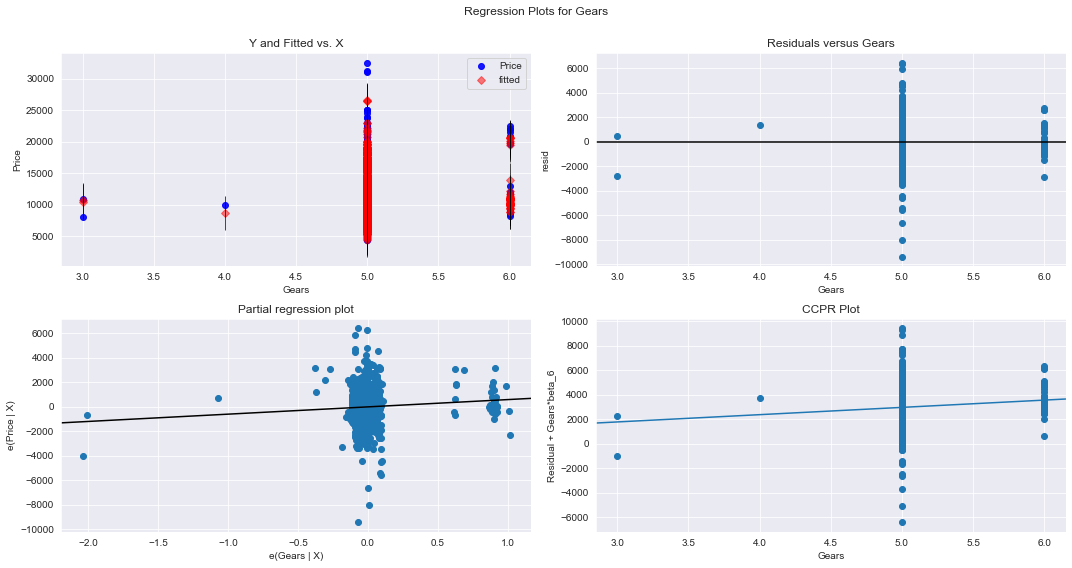

In [22]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


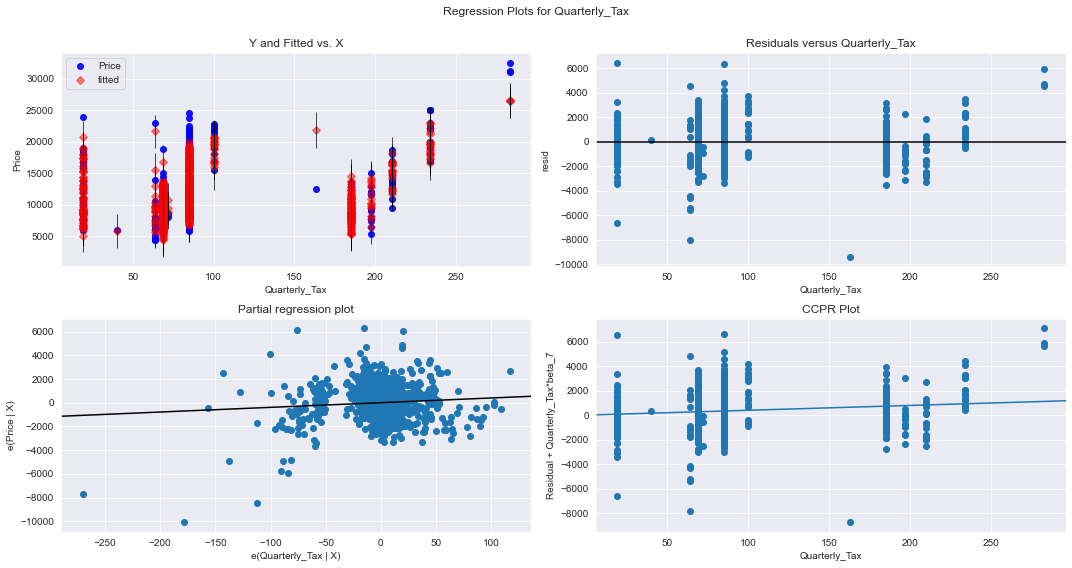

In [23]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


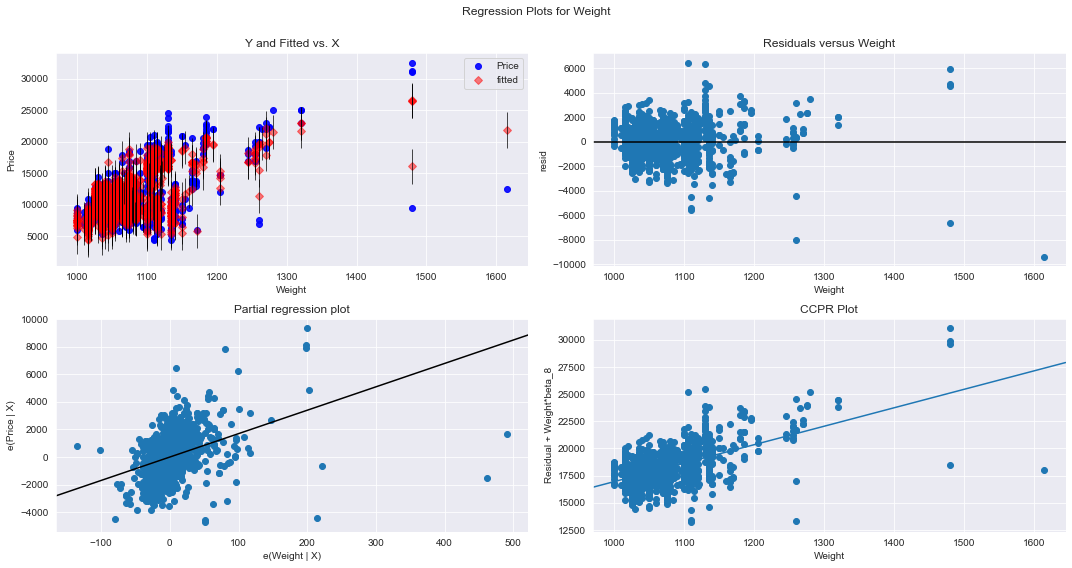

In [24]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Check if errors are coming from normal distribution

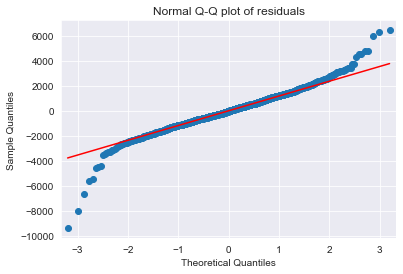

In [25]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

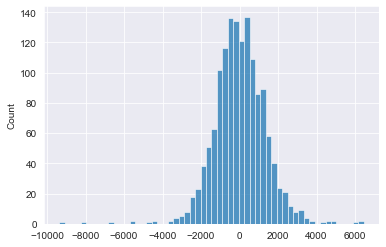

In [26]:
import seaborn as sns
sns.histplot(model.resid);

{'whiskers': [<matplotlib.lines.Line2D at 0x19c6cb887c0>,
 'caps': [<matplotlib.lines.Line2D at 0x19c6cb88d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x19c6cb7c2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x19c6cb94340>],
 'fliers': [<matplotlib.lines.Line2D at 0x19c6cb94610>],
 'means': []}

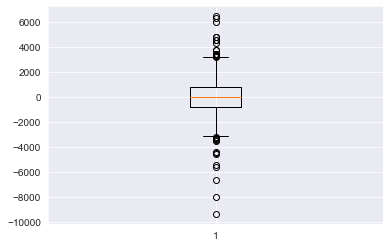

In [27]:
plt.boxplot(model.resid)

In [28]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

#error vs y_hat

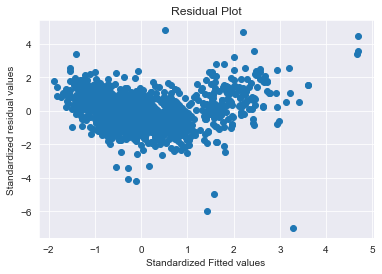

In [29]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

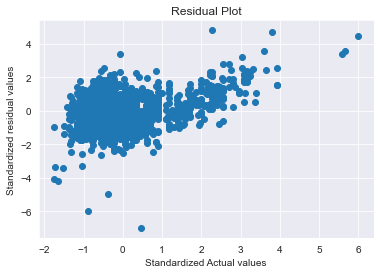

In [30]:
plt.scatter(get_standardized_values(Toyota_corolla.Price),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Actual values')
plt.ylabel('Standardized residual values')
plt.show()

# Cook's distance for  outlier

In [31]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [32]:
K=8
N=1436
3*(K+1)/N

0.018802228412256268

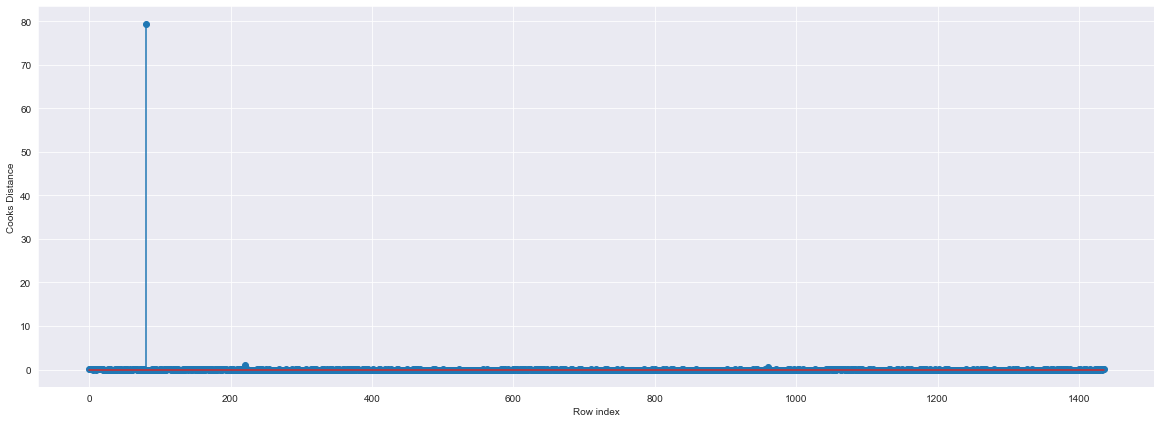

In [33]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(Toyota_corolla)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
(np.argmax(c),np.max(c))

(80, 79.52010624139909)

In [35]:
np.where(c>0.01880222841225626)

(array([  14,   16,   49,   80,  109,  110,  111,  141,  191,  192,  221,
         523,  601,  654,  960,  991, 1058], dtype=int64),)

In [36]:
Toyota_corolla_N = pd.read_csv("ToyotaCorolla.csv",encoding='ISO-8859–1')

In [37]:
Toyota_corolla_final=Toyota_corolla.drop(Toyota_corolla.index[[14,16,49,80,109,110,111,141,191,192,221,523,601,654,960,991,1058]],axis=0).reset_index()

In [38]:
Toyota_corolla_final.head(2)

,index,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,0,23,46986,90,2000,3,5,210,1165,13500
1,1,23,72937,90,2000,3,5,210,1165,13750


In [39]:
Toyota_corolla_final=Toyota_corolla_final.drop(['index'],axis=1)

In [40]:
Toyota_corolla_final

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1414,69,20544,86,1300,3,5,69,1025,7500
1415,72,19000,86,1300,3,5,69,1015,10845
1416,71,17016,86,1300,3,5,69,1015,8500
1417,70,16916,86,1300,3,5,69,1015,7250


In [41]:
final_model= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = Toyota_corolla_final).fit()

In [42]:
(final_model.rsquared,final_model.aic)

(0.8876657300062551, 24047.875456639104)

In [43]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1393.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:38:24   Log-Likelihood:                -12015.
No. Observations:                1419   AIC:                         2.405e+04
Df Residuals:                    1410   BIC:                         2.410e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.44e+04   1490.455     -9.663      0.000   -1.73e+04   -1.15e+04
Age_08_04      -111.4226      2.398    -46.467      0.000    -116.126    -106.719
KM               -0.0175      0.001    -15.347      0.000      -0.020      -0.015
HP               28.9815      2.768     10.472      0.000      23.552      34.410
cc               -3.3519      0.299    -11.216      0.000      -3.938      -2.766
Doors          -131.7533     36.184     -3.641      0.000    -202.733     -60.773
Gears           308.8824    180.506      1.711      0.087     -45.206     662.971
Quarterly_Tax     2.1111      1.358      1.555      0.120      -0.553       4.775
Weight           31.4161      1.395     22.514      0.000      28.679      34.153
==============================================================================
Omnibus:                       47.323   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.233
Skew:                           0.209   Prob(JB):                     2.09e-21
Kurtosis:                       4.198   Cond. No.                     3.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
new_data=pd.DataFrame({'Age_08_04':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Quarterly_Tax":210,"Gears":5,"Weight":1012},index=[0])
new_data

,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Gears,Weight
0,12,40000,80,1300,4,210,5,1012


In [45]:
final_model.predict(new_data)

0    14776.726022
dtype: float64